# 3D Plot of McCormick relaxations of camel-6 function

[Matthew Wilhelm](https://psor.uconn.edu/person/matthew-wilhelm/)  
Department of Chemical and Biomolecular Engineering, University of Connecticut

### Calculation of relaxations
In the below example, we illustrate how a method-overloading approach can be used to construct differentiable[1] and nonsmooth[2,3,4] McCormick relaxations of the function $f(x,y) = (4 - 2.1*x^2 + (x^4)/6)*x^2 + x*y + (-4 + 4*y^2)*y^2$ on $[-2, 0] \times [-0.5, 0.5]$.

Begin by importing, the necessary packages. We'll store our data to a `DataFrame`[5] structure for easy manipulation. 

Variables `X` and `Y` are set to intervals $[-2, 0]$ and $[-0.5, 0.5]$. Next, the McCormick relaxation of `x` and `y` on `X` and `Y` is constructed using `MC{N}`. Note that a different unit vector is used as the starting subgradient of `x_mc` and `y_mc`. This is passed to the function which then directly overloads the calculations and computes the relaxations of `f` at `(x,y)` on `(X,Y)`.

In [1]:
using EAGO, DataFrames, IntervalArithmetic

# initializes function to explicitly solve for x
f(x,y) = (4.0 - 2.1*x^2 + (x^4)/6.0)*x^2 + x*y + (-4.0 + 4.0*y^2)*y^2 # 6-hump camel

# create a data frame to store output data
df = DataFrame(x = Float64[], y = Float64[], z = Float64[], cv1 = Float64[], cv2 = Float64[],
               cc1 = Float64[], cc2 = Float64[], l1 = Float64[], l2 = Float64[],
               u1 = Float64[], u2 = Float64[])

n = 30
X = Interval{Float64}(-2,0)
Y = Interval{Float64}(-0.5,0.5)
xrange = range(X.lo,stop=X.hi,length=n)
yrange = range(Y.lo,stop=Y.hi,length=n)

for (i,x) in enumerate(xrange)
    for (j,y) in enumerate(yrange)
        z = f(x,y)
        x_mc = MC{1,NS}(x,X,1)
        y_mc = MC{1,NS}(y,Y,2)
        x_dmc = MC{1,Diff}(x,X,1)
        y_dmc = MC{1,Diff}(y,Y,2)
        f_mc = f(x_mc,y_mc)
        f_dmc = f(x_dmc,y_dmc)
        save_tuple = (x, y, z, f_dmc.cv, f_mc.cv, f_dmc.cc, f_mc.cc,
                      lo(f_dmc.Intv), lo(f_mc.Intv), hi(f_dmc.Intv), hi(f_mc.Intv))
        push!(df, save_tuple)
    end
end

### Visualization of the relaxation

The relaxation can then be plotted as shown below using the Plots.jl[6] package with the PlotlyJS backend.

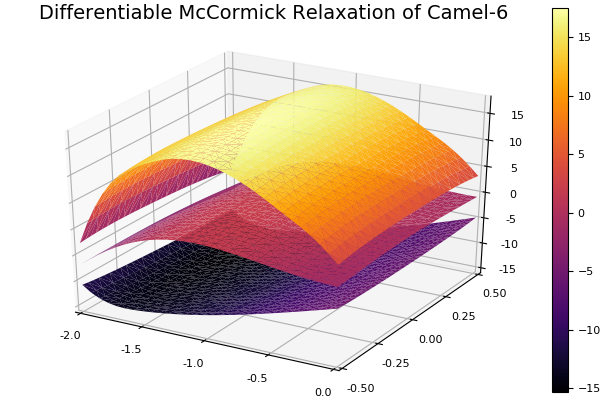

In [2]:
using Plots
pyplot()

Plots.plot(df.x, df.y, df.z, st = [:surface], title = "Differentiable McCormick Relaxation of Camel-6")
Plots.plot!(df.x, df.y, df.cv1, st = [:surface])
Plots.plot!(df.x, df.y, df.cc1, st = [:surface])

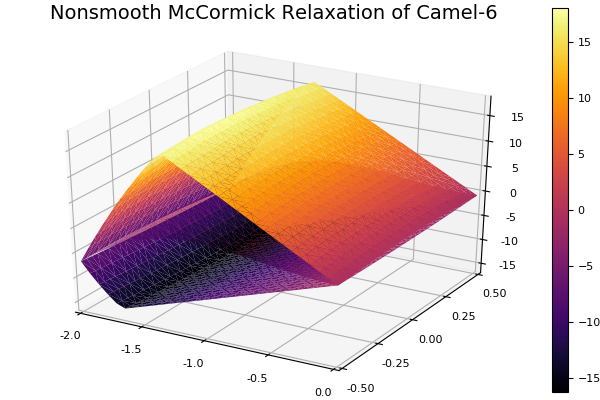

In [3]:
Plots.plot(df.x, df.y, df.z, st = [:surface], title = "Nonsmooth McCormick Relaxation of Camel-6")
Plots.plot!(df.x, df.y, df.cv2, st = [:surface])
Plots.plot!(df.x, df.y, df.cc2, st = [:surface])

Observe that the relaxations obtained after calling  `set_mc_differentiability!(0)` are clearly nonsmooth but generally tighter.

### References
1. Khan, K.A., Watson, H.J. and Barton, P.I., Differentiable McCormick relaxations, *Journal of Global Optimization*, *Springer*, **2017**, 67(4), 687-729.
2. McCormick, G.P., Computability of global solutions to factorable nonconvex programs: Part I --- Convex underestimating problems, *Mathematical Programming*, **1976**, 10(1), 147-175
3. Mitsos, A. Chachuat, B., & Barton, P.I., McCormick-based relaxations of algorithms, *SIAM Journal on Optimization*, *SIAM*, **2009**, 20(2), 573-601.
4. Scott, J.K., Stuber, M.D., & Barton, P.I., Generalized McCormick relaxations, *Journal of Global Optimization*, *Springer*, **2011**, 51, 569-606.
5. DataFrames.jl [Computer software] (2019). Retrieved from https://github.com/JuliaData/DataFrames.jl
6. Plots.jl [Computer software]. (2019). Retrieved from https://github.com/JuliaPlots/Plots.jl